WBC/RBC - Classifier

In [6]:

from tensorflow.keras.preprocessing import image_dataset_from_directory



data_train = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/Testlauf1',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=128,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.3,
                                        subset='training')
data_train


Found 42667 files belonging to 2 classes.
Using 29867 files for training.


<BatchDataset shapes: ((None, 150, 150, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [9]:
data_val = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClassifier/Testlauf1',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=128,
                                        image_size=(150,150),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.3,
                                        subset='validation')
data_val

Found 42667 files belonging to 2 classes.
Using 12800 files for validation.


<BatchDataset shapes: ((None, 150, 150, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(150,150,3)))
model.add(layers.Conv2D(4, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 4)       112       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 4)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 4)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 8)         296       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 36, 36, 8)        

In [11]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()

model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy','Recall'])

In [12]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(data_train,
                    epochs=15,
                    callbacks=es,
                    validation_data=data_val)

Epoch 1/15


2021-12-07 11:38:59.171910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-07 11:38:59.194251: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2894705000 Hz


234/234 [==============================] - 81s 340ms/step - loss: 0.0278 - accuracy: 0.9933 - recall: 0.9959 - val_loss: 1.8998e-04 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 2/15
234/234 [==============================] - 82s 350ms/step - loss: 0.0065 - accuracy: 0.9956 - recall: 0.9939 - val_loss: 9.3531e-05 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 3/15
234/234 [==============================] - 78s 334ms/step - loss: 0.0049 - accuracy: 0.9977 - recall: 0.9934 - val_loss: 4.4655e-06 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 4/15
234/234 [==============================] - 78s 333ms/step - loss: 0.0056 - accuracy: 0.9967 - recall: 0.9908 - val_loss: 6.3798e-06 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 5/15
234/234 [==============================] - 78s 334ms/step - loss: 0.0055 - accuracy: 0.9972 - recall: 0.9920 - val_loss: 6.7715e-07 - val_accuracy: 1.0000 - val_recall: 1.0000
Epoch 6/15
234/234 [==============================] - 80s 343ms/step - loss:

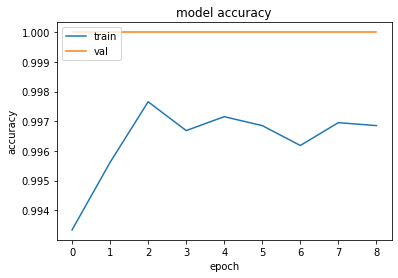

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

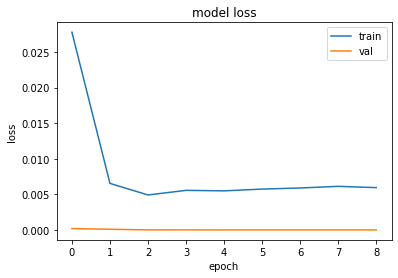

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [15]:
model.evaluate(data_val, return_dict=True)

100/100 [==============================] - 10s 99ms/step - loss: 1.5956e-07 - accuracy: 1.0000 - recall: 1.0000


{'loss': 1.5955625087826775e-07, 'accuracy': 1.0, 'recall': 1.0}